In [58]:
# Initial imports
import os
import requests
import pandas as pd
import tradermade as tm
import hvplot.pandas
from pathlib import Path
from datetime import datetime
import talib
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline



In [2]:
# set api key
tm.set_rest_api_key("CUA67dmfyikCZvVcLu_S")

In [3]:
#set time for today to get live data in time series
today = datetime.now().date


In [4]:
"""EUR/USD (Euro/US Dollar)
NZD/USD (New Zealand Dollar/US Dollar)
GBP/USD (British Pound/US Dollar)
USD/CAD (US Dollar/Canadian Dollar)
AUD/USD (Australian Dollar/US Dollar)"""
 
#get data
live_data = tm.live(currency='EURUSD,GBPUSD,NZDUSD,USDCAD,AUDUSD',fields=["bid", "mid", "ask"]) # returns live data - fields is optional
multiple_timeseries_data_1y = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2020-08-20", end = 'today', interval="daily",fields=["close"])
multiple_timeseries_data_1m = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2021-07-19",end="today",interval="hourly",fields=["close"])         


# multiple_timeseries_data_6m = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2021-02-19",end="2021-08-16",interval="daily",fields=["close"])
# multiple_timeseries_data_3m = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2021-05-19",end="2021-08-16",interval="daily",fields=["close"])


In [5]:
# save to CSV file
#multiple_timeseries_data_1y.to_csv(path_or_buf = '../project1/1y_data.csv', index = False)
#multiple_timeseries_data_1m.to_csv(path_or_buf = '../project1/1m_data.csv', index = False)

# Set the path
file_path = Path('../project1/1y_data.csv')
path_file = Path('../project1/1m_data.csv')
one_year_csv_df = pd.read_csv(file_path)
one_month_csv_df = pd.read_csv(path_file)
one_year_csv_df.head()

,date,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
0,2020-08-20,1.18599,1.32140,0.65353,0.75830,0.71921
1,2020-08-21,1.17964,1.30897,0.65405,0.75892,0.71601
2,2020-08-24,1.17882,1.30635,0.65267,0.75660,0.71618
3,2020-08-25,1.18342,1.31511,0.65477,0.75915,0.71947
4,2020-08-26,1.18312,1.32098,0.66214,0.76074,0.72335


In [6]:
#slice the 1 year data to not do so many API calls

six_month_data_sliced = one_year_csv_df.iloc[-126:]                # set_index('date').loc['2021-02-19':'2021-08-16']
three_month_data_sliced = one_year_csv_df.iloc[-63:]               #set_index('date').loc['2021-05-19':'2021-08-16']
three_month_data_sliced.head(10)

,date,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
199,2021-05-26,1.21927,1.41223,0.72824,0.82471,0.77430
200,2021-05-27,1.21941,1.42016,0.72934,0.82871,0.77425
201,2021-05-28,1.21923,1.41904,0.72479,0.82820,0.77099
202,2021-05-31,1.22259,1.42095,0.72735,0.82919,0.77342
203,2021-06-01,1.22140,1.41497,0.72571,0.82846,0.77526
204,2021-06-02,1.22102,1.41717,0.72370,0.83089,0.77524
205,2021-06-03,1.21270,1.41061,0.71460,0.82581,0.76604
206,2021-06-04,1.21670,1.41559,0.72127,0.82777,0.77429
207,2021-06-07,1.21891,1.41762,0.72271,0.82764,0.77553
208,2021-06-08,1.21730,1.41513,0.71951,0.82559,0.77371


In [57]:
live_data.head()

,instrument,timestamp,bid,mid,ask
0,EURUSD,2021-08-25 04:49:32,1.17390,1.17390,1.17390
1,GBPUSD,2021-08-25 04:49:32,1.37148,1.37150,1.37152
2,NZDUSD,2021-08-25 04:49:32,0.69420,0.69422,0.69424
3,USDCAD,2021-08-25 04:49:32,1.26176,1.26178,1.26180
4,AUDUSD,2021-08-25 04:49:32,0.72400,0.72401,0.72402


In [8]:
#create dataframe with just AUDUSD
df_audusd = one_year_csv_df[["AUDUSD", "date"]].set_index('date')

In [9]:
#Create charts
"""NEED TO CLEAN UP CHARTS AND ADD LABELS"""

one_year_chart = one_year_csv_df.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='1 year daily data', legend='top', height=500, width=620)
six_month_chart = six_month_data_sliced.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='6 month daily data', legend='top', height=500, width=620)
three_month_chart = three_month_data_sliced.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='3 month daily data', legend='top', height=500, width=620)
one_month_chart = one_month_csv_df.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='1 month hourly data', legend='top', height=500, width=620)
live_chart = live_data.hvplot.bar(x = 'instrument', y = 'mid')

"""We need to put the graphs in a column here, also need to start working on the dash board"""
one_year_chart

:NdOverlay   [Variable]
   :Curve   [date]   (1 year daily data)

In [10]:
# calculate daily returns of 1 year data
daily_returns = one_year_csv_df.set_index("date").pct_change().dropna()
daily_returns.head()

,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
date,,,,,
2020-08-21,-0.005354,-0.009407,0.000796,0.000818,-0.004449
2020-08-24,-0.000695,-0.002002,-0.002110,-0.003057,0.000237
2020-08-25,0.003902,0.006706,0.003218,0.003370,0.004594
2020-08-26,-0.000254,0.004464,0.011256,0.002094,0.005393
2020-08-27,-0.000786,-0.000643,0.002703,0.001275,0.003608


<AxesSubplot:xlabel='date'>

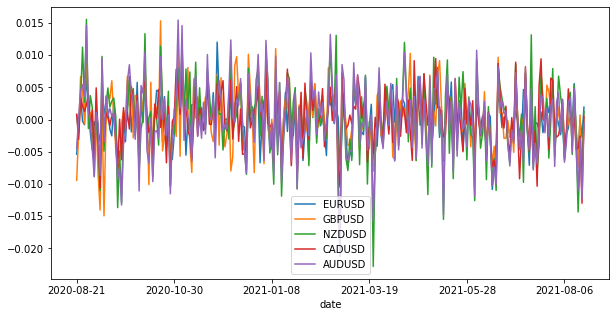

In [11]:
daily_returns.plot(figsize=(10,5))

In [12]:
#Corelation between forex pairs
correlation = daily_returns.corr()
correlation

,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
EURUSD,1.000000,0.580408,0.655937,0.519070,0.703789
GBPUSD,0.580408,1.000000,0.640573,0.572231,0.696138
NZDUSD,0.655937,0.640573,1.000000,0.676372,0.895336
CADUSD,0.519070,0.572231,0.676372,1.000000,0.727283
AUDUSD,0.703789,0.696138,0.895336,0.727283,1.000000


<AxesSubplot:>

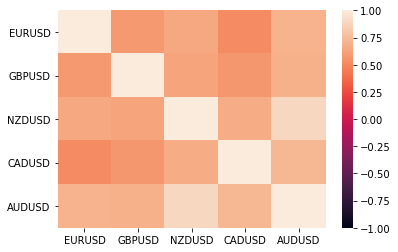

In [13]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [ ]:
# Create 20 day Simple moving average plot to see short term trend
sma20_audusd = talib.SMA(df_audusd['AUDUSD'].values, 20)
sma20_plot = plt.plot(sma20_audusd, label = 'SMA20 AUDUSD')
sma20_plot = plt.plot(df_audusd['AUDUSD'].values,label = 'Price')
sma20_plot = plt.legend(loc="best")

In [14]:
#Create RSI data using TAlib and send to CSV so it can be convereted to dataframe
audusd_rsi = talib.RSI(df_audusd['AUDUSD'], timeperiod=14) 
audusd_rsi.to_csv(path_or_buf = '../project1/audusd_rsi.csv')

In [15]:
#Read RSI data from CSV
rsi_file_path = Path('../project1/audusd_rsi.csv')
df_audusd_rsi = pd.read_csv(rsi_file_path)
df_audusd_rsi.head()

,date,0
0,2020-08-20,NaN
1,2020-08-21,NaN
2,2020-08-24,NaN
3,2020-08-25,NaN
4,2020-08-26,NaN


In [16]:
# Clean RSI data
# Set Index to date
df_audusd_rsi = df_audusd_rsi.set_index('date')

In [17]:
df_audusd_rsi.columns = ['RSI']

In [18]:
df_audusd_rsi = df_audusd_rsi.dropna()
df_audusd_rsi.head()

,RSI
date,
2020-09-09,59.210526
2020-09-10,56.127118
2020-09-11,58.587802
2020-09-14,58.977568
2020-09-15,60.178822


In [21]:
"""Creat bolinger band, potential trade signal"""
# upperband, middleband, lowerband = talib.BBANDS(df_audusd['AUDUSD'],timeperiod=5, nbdevup=1, nbdevdn=1, matype=0)
# plt.plot(df_audusd['AUDUSD'])
# plt.plot(upperband, label="upperband")
# plt.plot(middleband, label="middleband")
# plt.plot(lowerband, label="lowerband")
# plt.legend(loc='best')
# plt.figure(figsize=(100,50))

In [39]:
# concat RSI and AUDUSD dataframs
df_concat_rsi_audusd = pd.concat([df_audusd_rsi,df_audusd], axis = "columns", join= "inner")
# plot RSI chart
df_audusd_rsi.hvplot.line(x = 'date', label = "RSI AUDUSD", height=400, width=820)

:Curve   [date]   (RSI)

In [56]:
#create buy sell hold signal using RSI indicator
for i in range(len(df_audusd_rsi.iloc[0])):
    if df_audusd_rsi >= 70:
        print ("Sell")
    elif df_audusd_rsi <= 30:
        print ("Buy")
    else:
        print ("Hold")



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().